<a href="https://colab.research.google.com/github/edugovea/Introduccion_Machine_Learning_Tecnicatura_Data-Science/blob/main/API_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **API 3 - ML**

# Importamos librerias

In [ ]:
# --- Importación de Bibliotecas ---

#Importamos pandas para la Manipulación de datos
import pandas as pd

In [ ]:
#Importamos las librerias de los graficos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# De scikit-learn (sklearn), importamos las herramientas para nuestro modelo:
# train_test_split: Para dividir nuestros datos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

In [ ]:
# Importamos el árbol de decisión para clasificación
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# accuracy_score: La métrica para evaluar qué tan bueno es nuestro modelo.
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

# Carga de datos

In [ ]:
# --- Carga de Datos ---
# Cargamos los dos archivos CSV en Dataframes de pandas.
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

print("--- Datos cargados (train.csv y test.csv) ---")

--- Datos cargados (train.csv y test.csv) ---


In [ ]:
# Damos un primer vistazo a los datos de entretenimiento
print("\nPrimeras 3 filas del dataset de ENTRENAMIENTO (df_train):")
df_train.head(3)


Primeras 3 filas del dataset de ENTRENAMIENTO (df_train):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
#Damos un primer vistazo a los datos de testeos
print("\nPrimeras 3 filas del dataset de TESTEO (df_test):")
df_test.head(3)


Primeras 3 filas del dataset de TESTEO (df_test):


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Consiga A

Describir la cantidad de valores faltantes para cada una de las variables de la base de datos

In [ ]:
# --- CONSIGNÁ A: Describir valores faltantes ---
print("\n--- CONSIGNÁ A: Valores faltantes (ANTES) ---\n")
print("Valores faltantes en 'train.csv':")

# .isnull().sum() nos da el total de datos NA (nulos) por columna.
# Filtramos para mostrar solo las columnas que tienen datos faltantes.
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])

print("\nValores faltantes en 'test.csv':")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])


--- CONSIGNÁ A: Valores faltantes (ANTES) ---

Valores faltantes en 'train.csv':
Age         177
Cabin       687
Embarked      2
dtype: int64

Valores faltantes en 'test.csv':
Age       86
Fare       1
Cabin    327
dtype: int64


# Consiga B

Completar aquellas variables que se encuentran faltantes para las bases de datos de train ("Age", "Fare", "Cabin") y test ("Age", "Cabin", "embarked")

In [ ]:
# --- CONSIGNÁ B: Completar valores faltantes ---
# Esta es la etapa de "Imputación" de datos.
print("\n--- CONSIGNÁ B: Imputando valores faltantes ---")


--- CONSIGNÁ B: Imputando valores faltantes ---


# Variable Age (ambos)

In [ ]:
# --- CONSIGNÁ B: Completar valores faltantes ---
# Esta es la etapa de "Imputación" de datos.
print("\n--- CONSIGNÁ B: Imputando valores faltantes ---")


--- CONSIGNÁ B: Imputando valores faltantes ---


In [ ]:
# 1. Variable 'Age' (Edad)
# Rellenaremos la edad faltante con el promedio de edad de los datos
mean_age_train = df_train['Age'].mean()
print(f"Rellenando 'Age' de train con el promedio: {mean_age_train:.2f}")

mean_age_test = df_test['Age'].mean()
print(f"Rellenando 'Age' de test con el promedio: {mean_age_test:.2f}")

df_train['Age'] = df_train['Age'].fillna(mean_age_train)
df_test['Age'] = df_test['Age'].fillna(mean_age_test)

Rellenando 'Age' de train con el promedio: 29.70
Rellenando 'Age' de test con el promedio: 30.27


# Variable Fare (Tarifa)

In [ ]:
# 2. Variable 'Fare' (Tarifa)
# la consigna pide rellenar 'Fare' en 'test'
# Usamos el promedio

mean_fare_test = df_test['Fare'].mean()
print(f"Rellenando 'Fare' de test con el promedio: {mean_fare_test:.2f}")

df_test['Fare'] = df_test['Fare'].fillna(mean_fare_test)

Rellenando 'Fare' de test con el promedio: 35.63


# Variable Embarked (train)

In [ ]:
# 3. Variable 'Embarked' (Puerto de embarque)
# Rellenamos los datos faltantes con la "moda" (el valor más común) de los datos de entrenamiento

mode_embarked_train = df_train['Embarked'].mode()[0]
print(f"Rellenando 'Embarked' con la moda: {mode_embarked_train}")

df_train['Embarked'] = df_train['Embarked'].fillna(mode_embarked_train)

Rellenando 'Embarked' con la moda: S


# Variable Cabin (ambas)



*   Tiene demasiados datos faltantes en ambos datasets



In [ ]:
# Variable Cabin (ambas)

# --- Cálculo de porcentaje faltante para 'Cabin' ---

# Para train.csv
total_filas_train = len(df_train) # ó df_train.shape[0]
nulos_cabin_train = df_train['Cabin'].isnull().sum()
porcentaje_train = (nulos_cabin_train / total_filas_train) * 100
print(f"Porcentaje de 'Cabin' faltante en train.csv: {porcentaje_train:.2f}%")

# Para test.csv
total_filas_test = len(df_test) # ó df_test.shape[0]
nulos_cabin_test = df_test['Cabin'].isnull().sum()
porcentaje_test = (nulos_cabin_test / total_filas_test) * 100
print(f"Porcentaje de 'Cabin' faltante en test.csv: {porcentaje_test:.2f}%")

Porcentaje de 'Cabin' faltante en train.csv: 77.10%
Porcentaje de 'Cabin' faltante en test.csv: 78.23%


*   El porcentaje de datos faltantes en 'Cabin' para train y test está arriba del 75%
*   Se procede a eliminar la variable "Cabin" en train y test



In [ ]:
print("Eliminando la columna 'Cabin' (demasiados valores faltantes).")
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

Eliminando la columna 'Cabin' (demasiados valores faltantes).




*   Verificamos la columna train



In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')



*   Verificamos las columnas de test



In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Consiga B-2



*   Tenemos que preparar los datos para el modelo.
*   Vamos a convertir las variables categóricas en numéricas



In [ ]:
# --- Preparación de Datos para el Modelo ---
# Debemos convertir las variables categóricas.
print("--- Preparando datos para el modelo (Feature Engineering) ---")

# 6. B. Convertir 'Sex' (Texto) a numérico (0 ó 1)
# Usamos .map() para reemplazar 'male' por 0 y 'female' por 1.
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

# La variante con label encoder

# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# train_df["Sex"] = label_encoder.fit_transform(train_df["Sex"])
# test_df["Sex"] = label_encoder.fit_transform(test_df["Sex"])

--- Preparando datos para el modelo (Feature Engineering) ---


In [ ]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C


In [ ]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S




*   El "One-Hot Encoding" (pd.get_dummies) es una técnica para convertir variables categóricas (texto) en un formato numérico que el modelo pueda entender.
*   Toma una columna (como Embarked) y crea nuevas columnas, una por cada valor único (ej. Embarked_S, Embarked_C).
*   Si un pasajero embarcó en 'S', en su fila pondrá un 1 en la columna Embarked_S y un 0 en todas las demás. Es como si solo pudieras "encender" un switch a la vez.





In [ ]:
# 7. B. Convertir 'Embarked' (Texto) a numérico
# Usamos "One-Hot Encoding" (pd.get_dummies) que crea nuevas columnas (Embarked_S, Embarked_C, Embarked_Q)
# con valores 1 o 0, indicando el puerto.
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])

In [ ]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False


In [ ]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,False,True


Hacemos drop a las variables que no van a entrenar el modelo como 'PassengerId', 'Name' y 'Ticket'

In [ ]:
# 1. # Seleccionar las variables (features) que usará el modelo
# 2. # Eliminamos columnas que no aportan al modelo (como 'Name' o 'Ticket').
features_to_drop = ['PassengerId', 'Name', 'Ticket']
df_train_processed = df_train.drop(features_to_drop, axis=1)
df_test_processed = df_test.drop(features_to_drop, axis=1) # Preparado para predicciones futuras
print("Datos convertidos a formato numérico.")

Datos convertidos a formato numérico.


# Consiga C

Ajustar el primer modelo de arbol de decisión



*   Definimos a las variables X e Y con los datos de train



In [ ]:
# ---CONSIGNA C: Ajustar el primer modelo de arbol de decisión
print("\n--- Consigna C: Ajustando el modelo --- ")

# 1. Definir nuestras variables X (features) e Y (target)
# 'X' son las columnas que usamos para predecir.
# 'Y' es la columna que "queremos predecir" ('Survived').
X = df_train_processed.drop('Survived', axis=1)
y = df_train_processed['Survived']


--- Consigna C: Ajustando el modelo --- 


Ahora podemos aplicar train_test_split

In [ ]:
# 1. # Dividir los datos de 'train' en dos sets:
# 2. # X_train, y_train: 80% de los datos, para entrenar el modelo.
# 3. # X_test, y_test: 20% de los datos, para probar el modelo y medir el accuracy.
# 4. # ESTO ES IMPORTANTE: NO TENEMOS DATOS DE SURVIVED DE TEST
# 5. # test_size=0.2 significa 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

print(f"Datos de entrenamiento divididos: {len(X_train)} para entrenar, {len(X_test)} para probar.")

Datos de entrenamiento divididos: 712 para entrenar, 179 para probar.




*   Creamos modelo



In [ ]:
# 3 # 3. Crear (instanciar) el modelo
# 2 # Creamos el modelo
arbol = DecisionTreeClassifier(max_depth=4) # max_depth limita la profundidad para evitar sobreajuste



*   Entrenamos el modelo



In [ ]:
# 4. # Entrenar el modelo
# 2 # Usamos fit() para que el modelo "aprenda" la relación entre X_train e y_train.
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

# Consigna D

Finalmente, podemos entrenar y determinar el accuracy, F1-Score y Recall

In [ ]:
# 1 # --- CONSIGNÁ D: Entrenar y determinar el nivel de accuracy ---
print('\n--- CONSIGNÁ D: Nivel de Accuracy del Modelo ---')

# 4 # Hacer predicciones en el set de prueba (el 20% que separamos)
# 5 # El modelo ahora "adivina" quién sobrevivió en el set X_test.
y_pred = arbol.predict(X_test)
y_pred


--- CONSIGNÁ D: Nivel de Accuracy del Modelo ---


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0])

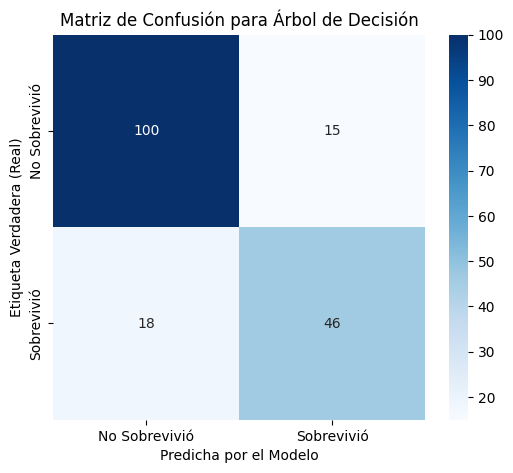

In [ ]:
# 1. Generar predicciones
y_pred = arbol.predict(X_test)

# 2. Calcular la Matriz de Confusión
# Se compara lo que realmente ocurrió (y_test) contra lo que predijo el modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# 3. Visualizar la Matriz de Confusión usando Seaborn (Mejor visualización)
plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, # Mostrar los números dentro de los cuadros
            fmt='d', # Formato decimal para los números
            cmap='Blues', # Color del mapa de calor
            xticklabels=['No Sobrevivió', 'Sobrevivió'], # Etiquetas del eje X (Predicho)
            yticklabels=['No Sobrevivió', 'Sobrevivió']) # Etiquetas del eje Y (Real)

plt.ylabel('Etiqueta Verdadera (Real)')
plt.xlabel('Predicha por el Modelo')
plt.title('Matriz de Confusión para Árbol de Decisión')
plt.show()

Resumen de Rendimiento

Aciertos (Diagonal Principal): El modelo acertó 146 veces en total $(100 + 46)$.



*   Acertó (VN) en 100 casos al predecir correctamente que alguien No Sobreviviría.
*   Acertó (VP) en 46 casos al predecir correctamente que alguien Sí Sobreviviría.

Errores (Diagonal Secundaria): El modelo se equivocó 33 veces en total $(15 + 18)$.




*   Error de tipo 1 (FP = 15): Solo 15 personas que realmente No Sobrevivieron fueron predichas erróneamente como sobrevivientes.
*   Error de tipo 2 (FN = 18): El error más común fue predecir que alguien No Sobreviviría, cuando en realidad Sí Sobrevivió.




# Score

Accuracy (Exactitud): ¿Qué porcentaje acertó en total? (Global).

Precision (Precisión): Cuando predijo "Sí", ¿cuántas veces tuvo razón? (Calidad).

Recall (Sensibilidad): De todos los "Sí" reales, ¿cuántos encontró? (Cantidad).

F1-Score: Promedio balanceado entre Precision y Recall. (El equilibrio).

In [ ]:
# 2 # Precisión en datos de ENTRENAMIENTO
train_accuracy = arbol.score(X_train, y_train)
# 4 -
# 5 # Precisión en datos de PRUEBA
test_accuracy = arbol.score(X_test, y_test)
# 7
print(f"Precisión en Entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en Prueba: {test_accuracy:.4f}")

Precisión en Entrenamiento: 0.8511
Precisión en Prueba: 0.8156


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [ ]:
# 1 # Mostramos los resultados
print(f"Accuracy: {accuracy:.2f} (79% de aciertos globales)")
print(f"Precision: {precision:.2f} (86% de confiabilidad al predecir sobrevivientes)")
print(f"Recall: {recall:.2f} (55% de los sobrevivientes reales encontrados)")
print(f"F1-Score: {f1_score:.2f} (Balance general)")

Accuracy: 0.82 (79% de aciertos globales)
Precision: 0.75 (86% de confiabilidad al predecir sobrevivientes)
Recall: 0.72 (55% de los sobrevivientes reales encontrados)
F1-Score: 0.74 (Balance general)


# Predicciones Finales

In [ ]:
# 1 # --- PREDICCIONES FINALES (sobre test.csv) ---
print("\n--- PREDICCIONES FINALES (sobre test.csv) ---")
print("Usando el modelo entrenado para predecir el archivo test.csv...")
# 4
# 5 # 1. Preparamos el set de test.csv
# 6 # Quitamos las columnas que no se usaron para entrenar el modelo
features_to_drop_test = ['PassengerId', 'Name', 'Ticket']
X_final_test = df_test.drop(features_to_drop_test, axis=1)
# 9
# 10 # 2. Hacer las predicciones finales
# 11 # Usamos el 'model' que ya entrenamos con X_train, y_train
final_predictions = arbol.predict(X_final_test)
# 13
final_predictions


--- PREDICCIONES FINALES (sobre test.csv) ---
Usando el modelo entrenado para predecir el archivo test.csv...


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Visualización el árbol

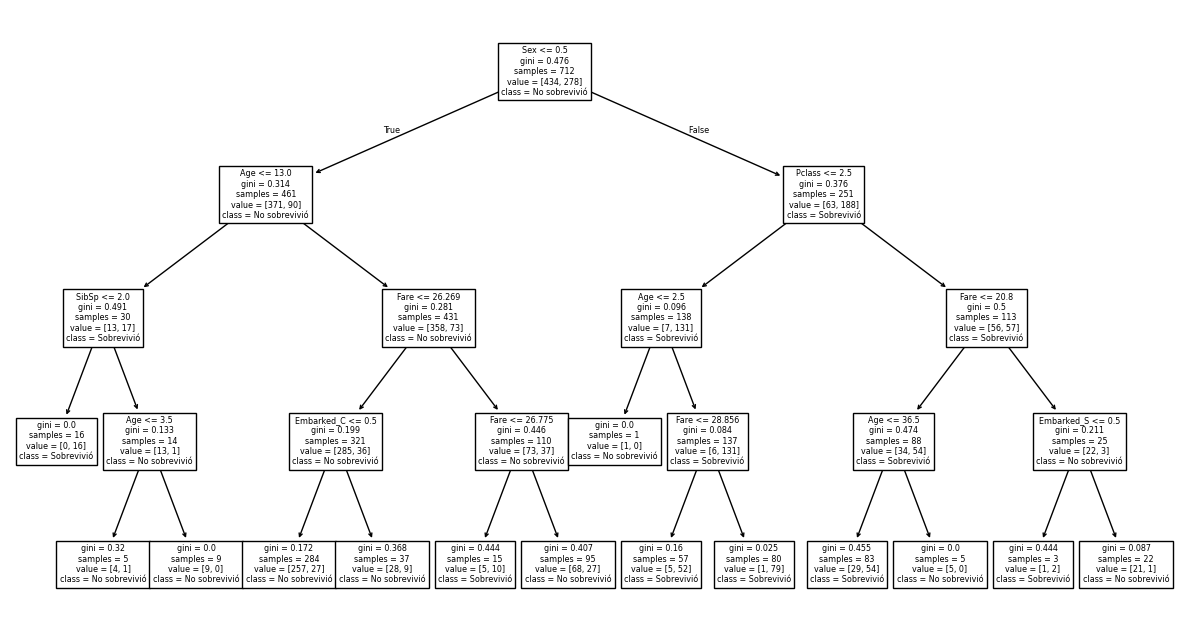

In [ ]:
from sklearn import tree

plt.figure(figsize = (15,8))
tree.plot_tree(arbol, feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
'Embarked_Q', 'Embarked_S'], class_names = ['No sobrevivió', 'Sobrevivió'])
plt.show()